#### Input

In [1]:
%load_ext autoreload
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers import plot_class
from helpers import helpfunction as helper

pd.options.display.max_columns = None

<IPython.core.display.Javascript object>

In [3]:
%autoreload

<IPython.core.display.Javascript object>

### Constants

In [4]:
run = 3
input_dir = "./input/16Jan/".format(run)
output_dir = "./output/run{}/".format(run)

<IPython.core.display.Javascript object>

In [5]:
data = pickle.load(open(input_dir + "after_training_run{}.pckl".format(run), "rb"))
samples = list(data.keys())

<IPython.core.display.Javascript object>

In [6]:
nue_frame = data["nue"]["daughters"]
nue_mc = data["nue"]["mc"]

<IPython.core.display.Javascript object>

In [7]:
# Redo the categories from scratch:
# Do not use the fid vol of the analyser at all
q_1 = "true_fid_vol & abs(nu_pdg)==12 & nelec>0 & (npi0+npion)>0"
q_10 = "true_fid_vol & abs(nu_pdg)==12 & nelec>0 & nproton==0 & (npi0+npion)==0"
q_11 = "true_fid_vol & abs(nu_pdg)==12 & nelec>0 & nproton>0 & (npi0+npion)==0"
q_2 = "true_fid_vol & abs(nu_pdg)==14 & nmuon>0 & npi0==0"
q_21 = "true_fid_vol & abs(nu_pdg)==14 & nmuon>0 & npi0>0"
q_3 = "true_fid_vol & ~((abs(nu_pdg)==12 & nelec>0) | (abs(nu_pdg)==14 & nmuon>0)) & npi0==0"
q_31 = "true_fid_vol & ~((abs(nu_pdg)==12 & nelec>0) | (abs(nu_pdg)==14 & nmuon>0)) & npi0>0"
q_5 = "true_fid_vol==0"

for s in samples:
    if s not in helper.data_samples:
        data[s]["mc"]["weightSplineTimesTune"] = np.nan_to_num(
            data[s]["mc"]["weightSplineTimesTune"]
        )
        data[s]["daughters"]["weightSplineTimesTune"] = np.nan_to_num(
            data[s]["daughters"]["weightSplineTimesTune"]
        )

        data[s]["daughters"]["true_fid_vol"] = np.repeat(
            helper.is_fid(
                *data[s]["daughters"][
                    ["true_nu_vtx_x", "true_nu_vtx_y", "true_nu_vtx_z"]
                ]
                .xs(0, level="daughter")
                .values.T
            ),
            data[s]["daughters"]["n_pfps"].xs(0, level="daughter"),
        )

        new_cat = (
            data[s]["daughters"].eval(q_1) * 1
            + data[s]["daughters"].eval(q_10) * 10
            + data[s]["daughters"].eval(q_11) * 11
            + data[s]["daughters"].eval(q_2) * 2
            + data[s]["daughters"].eval(q_21) * 21
            + data[s]["daughters"].eval(q_3) * 3
            + data[s]["daughters"].eval(q_31) * 31
            + data[s]["daughters"].eval(q_5) * 5
        )
        data[s]["daughters"]["category"] = new_cat

        cosmic = (data[s]["daughters"]["nu_purity_from_pfp"] < 0.5) & (
            data[s]["daughters"]["category"] != 5
        )
        data[s]["daughters"].loc[cosmic, "category"] = 4

<IPython.core.display.Javascript object>

In [8]:
nue_frame = data["nue"]["daughters"]
nue_mc = data["nue"]["mc"]

<IPython.core.display.Javascript object>

In [9]:
title_str = "MicroBooNE Run{}: {:.1e} POT".format(run, data["on"]["pot"])

<IPython.core.display.Javascript object>

In [10]:
list(nue_frame.keys())

['run',
 'sub',
 'evt',
 'topological_score',
 'n_pfps',
 'n_showers',
 'n_tracks',
 'reco_nu_vtx_sce_x',
 'reco_nu_vtx_sce_y',
 'reco_nu_vtx_sce_z',
 'reco_nu_vtx_x',
 'reco_nu_vtx_y',
 'reco_nu_vtx_z',
 'crtveto',
 'crthitpe',
 'slclustfrac',
 'contained_sps_ratio',
 'slpdg',
 'SliceCaloEnergy2',
 'NeutrinoEnergy2',
 'secondshower_Y_nhit',
 'secondshower_Y_vtxdist',
 'hits_ratio',
 'contained_fraction',
 'CosmicIP',
 'ismerged',
 'merge_bestdist',
 'trk_score_v',
 'trk_distance_v',
 'trk_theta_v',
 'trk_phi_v',
 'trk_len_v',
 'trk_llr_pid_score_v',
 'trk_mcs_muon_mom_v',
 'trk_calo_energy_y_v',
 'trk_sce_end_x_v',
 'trk_sce_end_y_v',
 'trk_sce_end_z_v',
 'trk_sce_start_x_v',
 'trk_sce_start_y_v',
 'trk_sce_start_z_v',
 'trk_start_x_v',
 'trk_start_y_v',
 'trk_start_z_v',
 'shr_dist_v',
 'shr_energy_y_v',
 'shr_energy_u_v',
 'shr_energy_v_v',
 'shr_tkfit_start_x_v',
 'shr_tkfit_start_y_v',
 'shr_tkfit_start_z_v',
 'shr_start_x_v',
 'shr_start_y_v',
 'shr_start_z_v',
 'shr_tkfit_theta_

<IPython.core.display.Javascript object>

In [11]:
plotter = plot_class.Plotter(data, signal="nue", genie_version="mcc9.1")

Using the spline weights as in MCC9.1 Genie V3 tune 1
Initialisation completed!


<IPython.core.display.Javascript object>

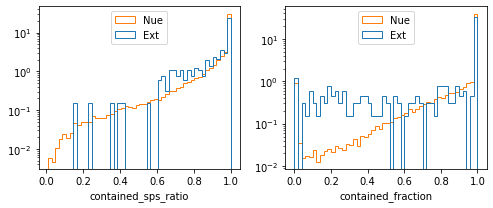

<IPython.core.display.Javascript object>

In [12]:
### PLOT the containment!
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(7, 3))

plot_data = [
    data["off"]["daughters"].query("e_candidate>0 & preselect")["contained_sps_ratio"],
    data["nue"]["daughters"].query("e_candidate>0 & preselect & nueccinc")[
        "contained_sps_ratio"
    ],
    data["off"]["daughters"].query("e_candidate>0 & preselect")["contained_fraction"],
    data["nue"]["daughters"].query("e_candidate>0 & preselect & nueccinc")[
        "contained_fraction"
    ],
]
ax[0].hist(plot_data[0:2], bins=50, density=True, label=["Ext", "Nue"], histtype="step")
ax[0].legend(loc="upper center")
ax[0].set_xlabel("contained_sps_ratio")
ax[0].set_yscale("log")

ax[1].hist(plot_data[2:4], bins=50, density=True, label=["Ext", "Nue"], histtype="step")
ax[1].legend(loc="upper center")
ax[1].set_xlabel("contained_fraction")
ax[1].set_yscale("log")

fig.tight_layout()

In [13]:
del data

<IPython.core.display.Javascript object>

### Evaluation

In [14]:
q_s = "(select & e_candidate)"

<IPython.core.display.Javascript object>

In [15]:
print(nue_frame.query("n_pfps>0")["true_category"].value_counts())
print()
print(nue_frame.query(q_s)["category"].value_counts())
print()
print(nue_frame.query(q_s)["interaction"].value_counts())

3    144859
2    118086
6     49339
1     19633
4        81
5         6
Name: true_category, dtype: int64

11    12360
1      3664
10     2179
5        82
4        40
Name: category, dtype: int64

0     9655
1     4951
10    2586
2     1110
3       23
Name: interaction, dtype: int64


<IPython.core.display.Javascript object>

In [16]:
print(pd.Series(nue_mc["category"]).value_counts())
print()
print(pd.Series(nue_mc["interaction"]).value_counts())
print()
print(pd.Series(nue_mc["true_category"]).value_counts())

11    41877
1     35722
0     24501
5     10503
10     9428
3        19
31       11
dtype: int64

0     46956
1     44464
2     17661
10    12586
3       394
dtype: int64

2    46563
3    38504
6    26094
1    10860
4       39
5        1
dtype: int64


<IPython.core.display.Javascript object>

### Plots

#### Signal sample plots

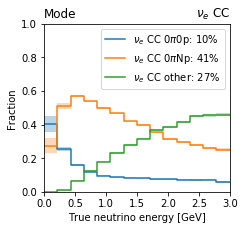

<IPython.core.display.Javascript object>

In [17]:
cats = {1: 10, 2: 11, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat, cat_d in cats.items():
    den = nue_mc[field]
    num = nue_mc[field][nue_mc["true_category"] == cat]

    den_w = nue_mc["weightSplineTimesTune"]
    num_w = nue_mc["weightSplineTimesTune"][nue_mc["true_category"] == cat]

    eff, unc_low, unc_up, edges = plot_class.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0}: {1:.0f}%".format(
            plotter.dicts.category_labels[cat_d], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Mode", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_cat.pdf", bbox_inches="tight")

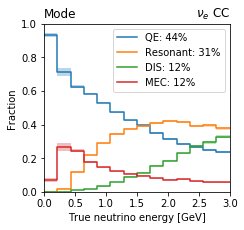

<IPython.core.display.Javascript object>

In [18]:
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat in cats:
    den = nue_mc[field]
    num = nue_mc[field][nue_mc["interaction"] == cat]

    den_w = nue_mc["weightSplineTimesTune"]
    num_w = nue_mc["weightSplineTimesTune"][nue_mc["interaction"] == cat]

    eff, unc_low, unc_up, edges = plot_class.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0}: {1:.0f}%".format(
            plotter.dicts.int_labels[cat], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Mode", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_int.pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:464: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.13%
Purity: 3.51%
Purity: 45.95%


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:464: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.13%
Purity: 3.51%
Purity: 45.95%


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:464: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.13%
Purity: 3.51%
Purity: 45.95%


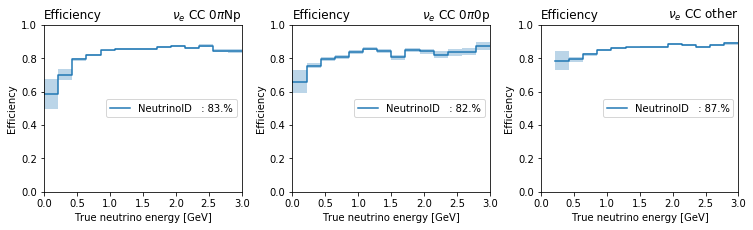

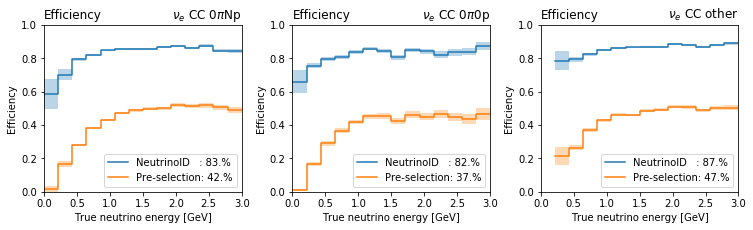

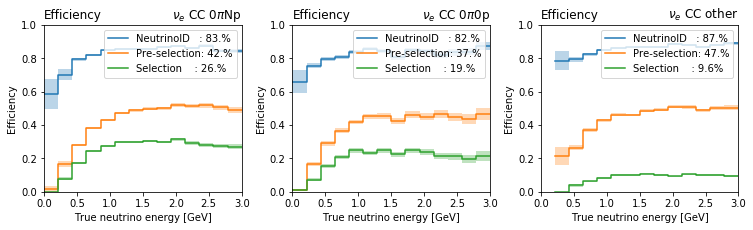

<IPython.core.display.Javascript object>

In [19]:
# eff per cat
cats = {2: 11, 1: 10, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = ["daughter==0", "e_candidate & preselect", "e_candidate & select"]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]

for i in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3.3))

    for cat, ax in zip(cats.keys(), axes):
        for selector, lab in zip(selectors[: (i + 1)], labs):
            num = nue_frame.query(selector).query("true_category==@cat")[field]
            den = nue_mc[field][nue_mc["true_category"] == cat]

            num_w = nue_frame.query(selector).query("true_category==@cat")[
                "weightSplineTimesTune"
            ]
            den_w = nue_mc["weightSplineTimesTune"][nue_mc["true_category"] == cat]

            eff, unc_low, unc_up, edges = plot_class.efficiency_post(
                num,
                den,
                num_w=num_w,
                den_w=den_w,
                n_bins=n_bins,
                x_min=x_min,
                x_max=x_max,
            )
            ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
            ax.step(
                edges,
                eff,
                where="post",
                label="{0:<13}: {1:#.2g}%".format(lab, sum(num_w) / sum(den_w) * 100),
            )
        ax.set_title(plotter.dicts.category_labels[cats[cat]], loc="right")
        ax.set_title("Efficiency", loc="left")
        ax.set_xlabel("True neutrino energy [GeV]")
        ax.set_ylabel("Efficiency")
        ax.set_ylim(0, 1)
        ax.set_xlim(x_min, x_max)
        if i == 0:
            ax.legend(loc="center right")
        elif i == 1:
            ax.legend(loc="lower right")
        else:
            ax.legend(loc="upper right")

    fig.tight_layout()

    for selector in selectors:
        print(
            "Purity: {:.2f}%".format(100 * plotter.get_purity(selector, cats.values()))
        )
    fig.savefig(output_dir + "efficiency_cat_" + str(i) + ".pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:464: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


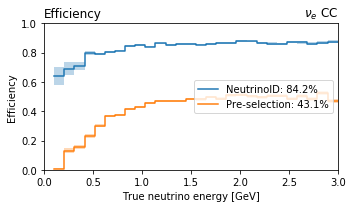

<IPython.core.display.Javascript object>

In [20]:
# eff total
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 30
selectors = [
    "n_pfps>0 & daughter==0",
    "e_candidate & preselect",
    # "e_candidate & select",
]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]
fig, ax = plt.subplots(ncols=1, figsize=(5, 3))


for selector, lab in zip(selectors, labs):
    num = nue_frame.query(selector).query("nueccinc")[field]
    den = nue_mc[field][nue_mc["nueccinc"] == 1]

    num_w = nue_frame.query(selector).query("nueccinc")["weightSplineTimesTune"]
    den_w = nue_mc["weightSplineTimesTune"][nue_mc["nueccinc"] == 1]

    eff, unc_low, unc_up, edges = plot_class.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0}: {1:.1%}".format(lab, sum(num_w) / sum(den_w)),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Efficiency", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Efficiency")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="center right")

fig.tight_layout()
fig.savefig(output_dir + "efficiency_all_1.pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:464: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


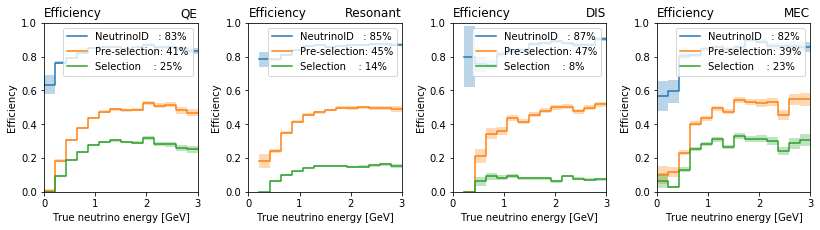

<IPython.core.display.Javascript object>

In [21]:
# eff per mode
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = [
    "n_pfps>0 & daughter==0",
    "e_candidate & preselect",
    "e_candidate & select",
]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]
fig, axes = plt.subplots(ncols=4, figsize=(11.5, 3.3))

for cat, ax in zip(cats, axes):
    for selector, lab in zip(selectors, labs):
        num = nue_frame.query(selector).query("interaction==@cat & nueccinc")[field]
        den = nue_mc[field][(nue_mc["interaction"] == cat) & nue_mc["nueccinc"] == 1]

        num_w = nue_frame.query(selector).query("interaction==@cat & nueccinc")[
            "weightSplineTimesTune"
        ]
        den_w = nue_mc["weightSplineTimesTune"][
            (nue_mc["interaction"] == cat) & nue_mc["nueccinc"] == 1
        ]

        eff, unc_low, unc_up, edges = plot_class.efficiency_post(
            num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
        )
        ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
        ax.step(
            edges,
            eff,
            where="post",
            label="{0:<13}: {1:.0f}%".format(lab, sum(num_w) / sum(den_w) * 100),
        )
    ax.set_title(plotter.dicts.int_labels[cat], loc="right")
    ax.set_title("Efficiency", loc="left")
    ax.set_xlabel("True neutrino energy [GeV]")
    ax.set_ylabel("Efficiency")
    ax.set_ylim(0, 1)
    ax.set_xlim(x_min, x_max)
    ax.legend(loc="upper right")

fig.tight_layout()
fig.savefig(output_dir + "efficiency_int.pdf", bbox_inches="tight")

#### Data/MC comparison

MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


$\nu_e$ CC other: 2.1
$\nu_e$ CC 0$\pi$0p: 0.62
$\nu_e$ CC 0$\pi$Np: 2.9
$\nu_{\mu}$ CC other: 23.
$\nu_{\mu}$ CC $\pi^{0}$: 66.
$\nu$ NC: 4.6
$\nu$ NC $\pi^{0}$: 34.
Cosmic: 11.
Out of FV: 7.1


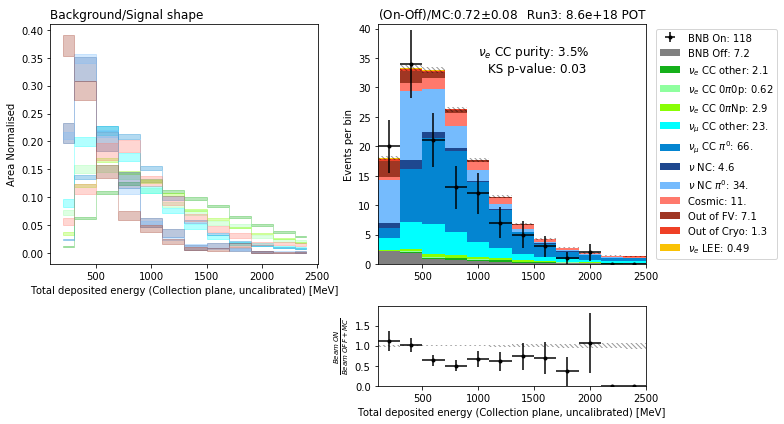

<IPython.core.display.Javascript object>

In [22]:
# Example of the multipanel plotting
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 6), gridspec_kw={"height_ratios": [3, 1]}
)
plotter.plot_variable(
    ax,
    "NeutrinoEnergy2",
    "Total deposited energy (Collection plane, uncalibrated) [MeV]",
    N_bins=12,
    x_min=100,
    x_max=2500,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)


fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_panel test.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


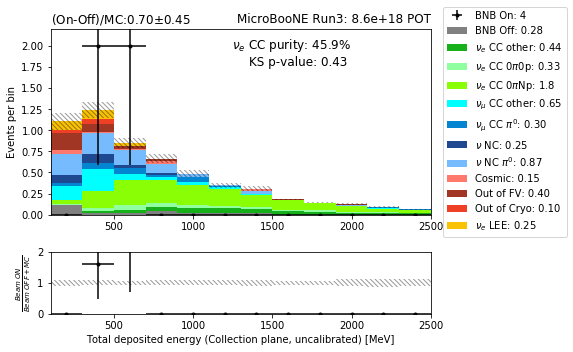

<IPython.core.display.Javascript object>

In [23]:
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(5 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "NeutrinoEnergy2",
    "Total deposited energy (Collection plane, uncalibrated) [MeV]",
    N_bins=12,
    x_min=100,
    x_max=2500,
    query=q_s,
    legend=True,
    title_str=title_str,
    kind="cat",
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.8,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

# ax[0].set_ylim(0, 0.3)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_neutrinoenergy2_y.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


array([  50.,  150.,  250.,  350.,  450.,  550.,  650.,  750.,  850.,
        950., 1050., 1150., 1250., 1350., 1450., 1550., 1650., 1750.])

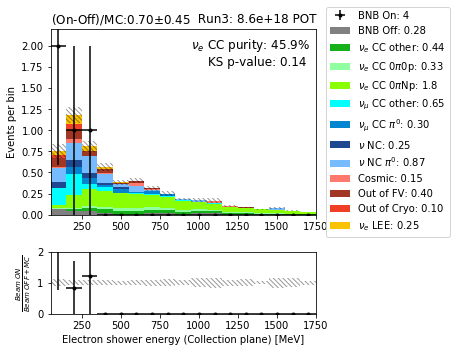

<IPython.core.display.Javascript object>

In [24]:
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_energy_y_v",
    "Electron shower energy (Collection plane) [MeV]",
    N_bins=17,
    x_min=50,
    x_max=1750,
    query=q_s,
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="cat",
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

# ax[0].set_ylim(0, 0.3)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_energy_y.pdf", bbox_inches="tight")

bin_dict[2]

MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


array([-3.14159265, -2.61799388, -2.0943951 , -1.57079633, -1.04719755,
       -0.52359878,  0.        ,  0.52359878,  1.04719755,  1.57079633,
        2.0943951 ,  2.61799388,  3.14159265])

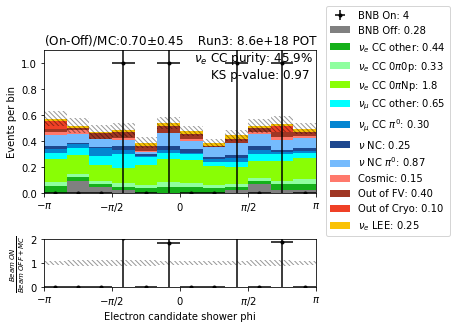

<IPython.core.display.Javascript object>

In [25]:
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plotter.gr, 4.5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_tkfit_phi_v",
    "Electron candidate shower phi",
    N_bins=12,
    x_min=-np.pi,
    x_max=np.pi,
    query=q_s,
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="cat",
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_labels)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_phi.pdf", bbox_inches="tight")
bin_dict[2]

MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


array([0.        , 0.26179939, 0.52359878, 0.78539816, 1.04719755,
       1.30899694, 1.57079633, 1.83259571, 2.0943951 , 2.35619449,
       2.61799388, 2.87979327, 3.14159265])

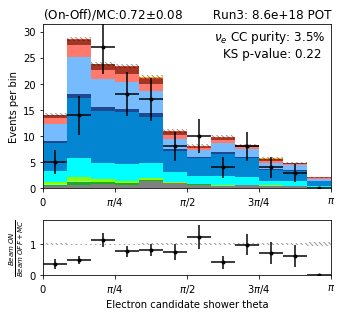

<IPython.core.display.Javascript object>

In [26]:
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(3 * plotter.gr, 4.5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_tkfit_theta_v",
    "Electron candidate shower theta",
    N_bins=12,
    x_min=0,
    x_max=np.pi,
    query="preselect & e_candidate",
    legend=False,
    title_str=title_str.split("NE")[-1],
    kind="cat",
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_labels)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_theta.pdf", bbox_inches="tight")
bin_dict[2]

MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


[-2.879793265790644,
 -2.356194490192345,
 -1.8325957145940461,
 -1.3089969389957472,
 -0.7853981633974485,
 -0.2617993877991496,
 0.26179938779914935,
 0.7853981633974481,
 1.308996938995747,
 1.8325957145940457,
 2.3561944901923444,
 2.8797932657906435]

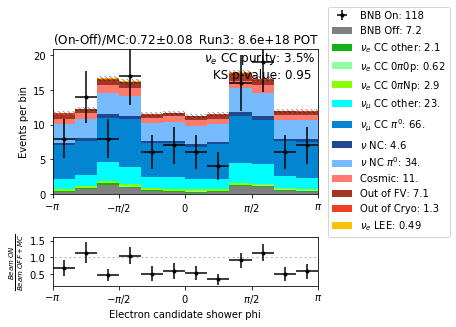

<IPython.core.display.Javascript object>

In [27]:
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plotter.gr, 4.5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_tkfit_phi_v",
    "Electron candidate shower phi",
    N_bins=12,
    x_min=-np.pi,
    x_max=np.pi,
    query="e_candidate & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="cat",
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_labels)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_phi.pdf", bbox_inches="tight")
bin_dict[1]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:313: RuntimeWarning: invalid value encountered in double_scalars
  sc_err = e / v
/home/wouter/Documents/Jupyt

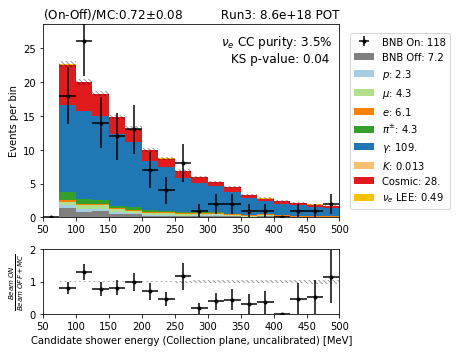

<IPython.core.display.Javascript object>

In [28]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_energy_y_v",
    "Candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=18,
    x_min=50,
    x_max=500,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.1,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_E_pdg.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3
MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3


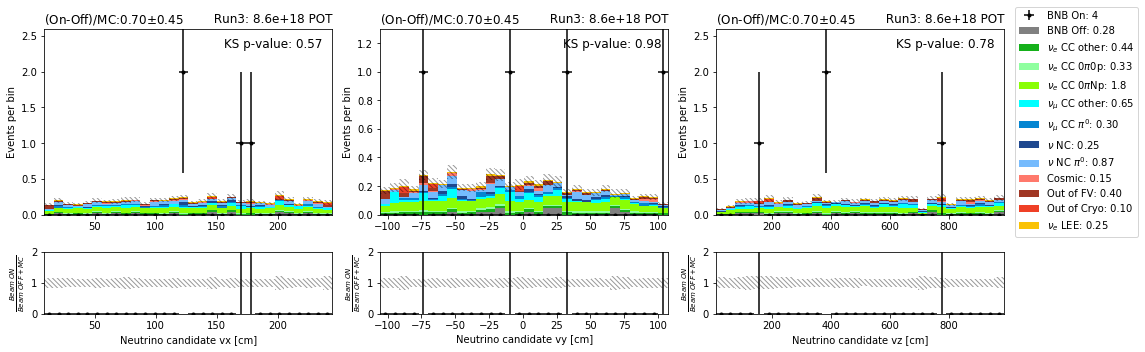

<IPython.core.display.Javascript object>

In [29]:
fig, ax = plt.subplots(
    ncols=3, nrows=2, figsize=(16, 5), gridspec_kw={"height_ratios": [3, 1]}
)


field_arr = ["reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z"]
lab_arr = [
    "Neutrino candidate vx [cm]",
    "Neutrino candidate vy [cm]",
    "Neutrino candidate vz [cm]",
]
x_min_arr = helper.lower + np.array([10, 10, 10])
x_max_arr = helper.upper - np.array([10, 10, 50])

for i, (x_min, x_max, lab, field) in enumerate(
    zip(x_min_arr, x_max_arr, lab_arr, field_arr)
):
    ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
        ax.T[i],
        field,
        lab,
        N_bins=30,
        x_min=x_min,
        x_max=x_max,
        query="e_candidate>0 & select",
        legend=(i == 2),
        title_str=title_str.split("NE")[-1],
        kind="cat",
        y_max_scaler=1.3,
    )
    ax[0][i].text(
        ax[0][i].get_xlim()[1] * 0.98,
        ax[0][i].get_ylim()[1] * 0.9,
        "KS p-value: {0:<5.2f}".format(ks_p),
        horizontalalignment="right",
        fontsize=12,
    )

fig.tight_layout()
fig.savefig(output_dir + "data_mc/post_vtx.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


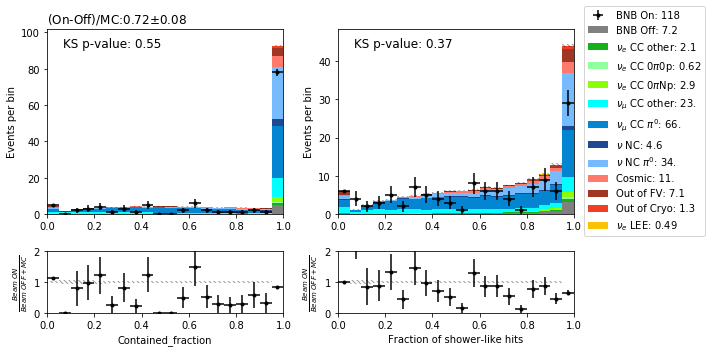

<IPython.core.display.Javascript object>

In [30]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(10, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "contained_fraction",
    r"Contained_fraction",
    N_bins=20,
    x_min=0,
    x_max=1,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="cat",
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.5,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)


ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "hits_ratio",
    r"Fraction of shower-like hits",
    N_bins=20,
    x_min=0,
    x_max=1,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="cat",
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.5,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][1].set_title("", loc="left")

fig.tight_layout()
fig.savefig(output_dir + "data_mc/bdt_1.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


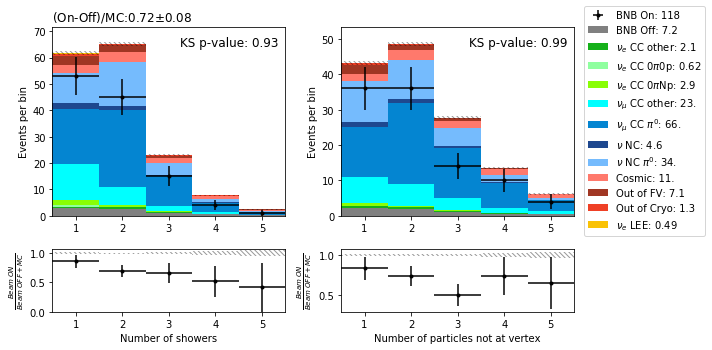

<IPython.core.display.Javascript object>

In [31]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(10, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "n_showers",
    r"Number of showers",
    N_bins=5,
    x_min=0.5,
    x_max=5.5,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="cat",
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.99,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)


ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "n_pfp_farvtx",
    r"Number of particles not at vertex",
    N_bins=5,
    x_min=0.5,
    x_max=5.5,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="cat",
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.99,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][1].set_title("", loc="left")

fig.tight_layout()
fig.savefig(output_dir + "data_mc/bdt_2.pdf", bbox_inches="tight")

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 16.9 µs
MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


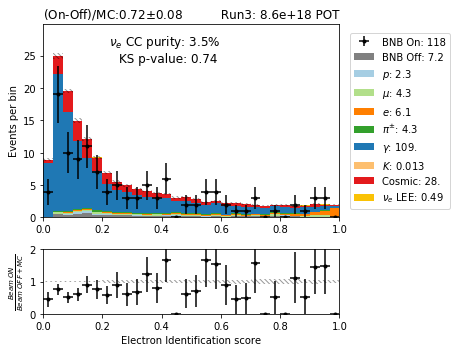

<IPython.core.display.Javascript object>

In [32]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "score",
    "Electron Identification score",
    N_bins=30,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.6,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_e_score.pdf", bbox_inches="tight")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


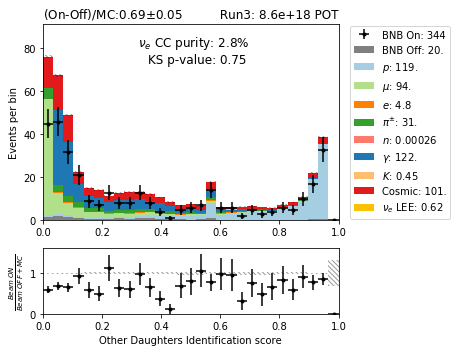

<IPython.core.display.Javascript object>

In [33]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "score",
    "Other Daughters Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.7,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_score.pdf", bbox_inches="tight")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


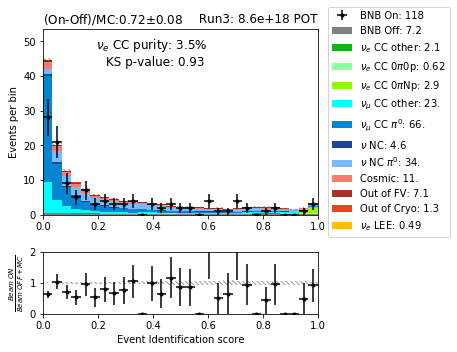

<IPython.core.display.Javascript object>

In [34]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "score_event",
    "Event Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.6,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_event_score.pdf", bbox_inches="tight")

## Shower fields
1. feature shr_dist_v (0.498275)
2. feature ismerged (0.126099)
3. feature shr_moliere_avg_v (0.091849)
4. feature shr_subclusters_v (0.063601)
5. feature shr_tkfit_dedx_wm_v (0.059538)
6. feature shr_tkfit_dedx_y_v (0.058489)
7. feature secondshower_Y_nhit (0.041072)
8. feature shr_tkfit_gap10_dedx_y_v (0.040629)
9. feature secondshower_Y_vtxdist (0.020448)

MC category: $p$: 0.045 	#entries 7
MC category: $\mu$: 0.57 	#entries 70
MC category: $e$: 2.6 	#entries 18604
MC category: $\pi^{\pm}$: 0.078 	#entries 16
MC category: $\gamma$: 1.5 	#entries 250
MC category: Cosmic: 0.56 	#entries 75


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 0.045 	#entries 7
MC category: $\mu$: 0.57 	#entries 70
MC category: $e$: 2.6 	#entries 18604
MC category: $\pi^{\pm}$: 0.078 	#entries 16
MC category: $\gamma$: 1.5 	#entries 250
MC category: Cosmic: 0.56 	#entries 75


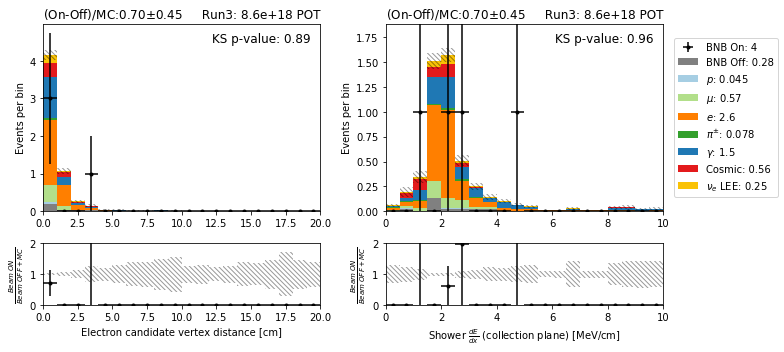

<IPython.core.display.Javascript object>

In [35]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_dist_v",
    "Electron candidate vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=20,
    legend=False,
    query="e_candidate>0 & select",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_dedx_y_v",
    r"Shower $\frac{dE}{dx}$ (collection plane) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    query="e_candidate>0 & select",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/post_e_cand_dist.pdf", bbox_inches="tight")

MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876
MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


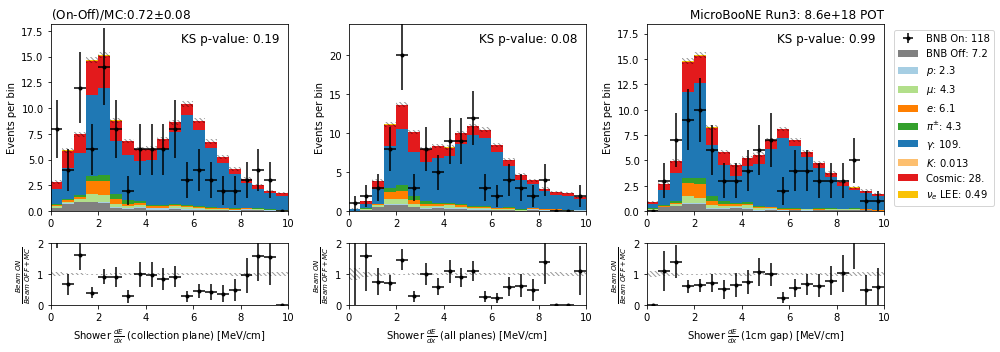

<IPython.core.display.Javascript object>

In [36]:
fig, ax = plt.subplots(
    ncols=3, nrows=2, figsize=(14, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_tkfit_dedx_y_v",
    r"Shower $\frac{dE}{dx}$ (collection plane) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)


ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_dedx_wm_v",
    r"Shower $\frac{dE}{dx}$ (all planes) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][1].set_title("", loc="left")

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[2],
    "shr_tkfit_gap10_dedx_y_v",
    r"Shower $\frac{dE}{dx}$ (1cm gap) [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str,
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][2].text(
    ax[0][2].get_xlim()[1] * 0.98,
    ax[0][2].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][2].set_title("", loc="left")

fig.tight_layout()
fig.savefig(output_dir + "data_mc/e_cand_dedx.pdf", bbox_inches="tight")

MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:313: RuntimeWarning: invalid value encountered in double_scalars
  sc_err = e / v
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:335: RuntimeWarning: invalid value encountered in true_divide
  y_min_r = max(0, min((bins[-1]-err_on)/val)*0.9)
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:336: RuntimeWarning: invalid value encountered in true_divide
  y_max_r = min(2, max((bins[-1]+err_on)/val)*1.1)
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:342: RuntimeWarning: invalid value encountered in true_divide
  bins[-1] / val,
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:344: RuntimeWarning: invalid value encountered in true_divide
  yerr=err_on / val,


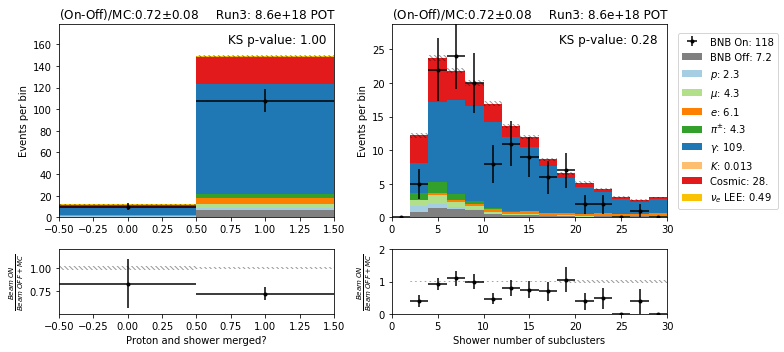

<IPython.core.display.Javascript object>

In [37]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "ismerged",
    "Proton and shower merged?",
    N_bins=2,
    x_min=-0.5,
    x_max=1.5,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_subclusters_v",
    r"Shower number of subclusters",
    N_bins=15,
    x_min=0,
    x_max=30,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/e_cand_subclusters.pdf", bbox_inches="tight")

MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 2.3 	#entries 427
MC category: $\mu$: 4.3 	#entries 552
MC category: $e$: 6.1 	#entries 39906
MC category: $\pi^{\pm}$: 4.3 	#entries 781
MC category: $\gamma$: 109. 	#entries 19652
MC category: $K$: 0.013 	#entries 2
MC category: Cosmic: 28. 	#entries 4876


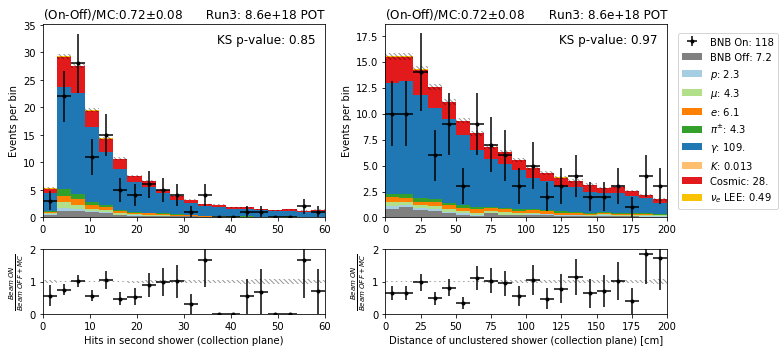

<IPython.core.display.Javascript object>

In [38]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "secondshower_Y_nhit",
    "Hits in second shower (collection plane)",
    N_bins=20,
    x_min=0,
    x_max=60,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "secondshower_Y_vtxdist",
    r"Distance of unclustered shower (collection plane) [cm]",
    N_bins=20,
    x_min=0,
    x_max=200,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/e_cand_secondshower.pdf", bbox_inches="tight")

## Other daughter fields
1. feature trk_llr_pid_score_v (0.616502)
2. feature trk_distance_v (0.199922)
3. feature trk_score_v (0.089212)
4. feature pfp_trk_daughters_v (0.040144)
5. feature pfp_generation_v (0.036762)
6. feature pfp_shr_daughters_v (0.017458)

MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


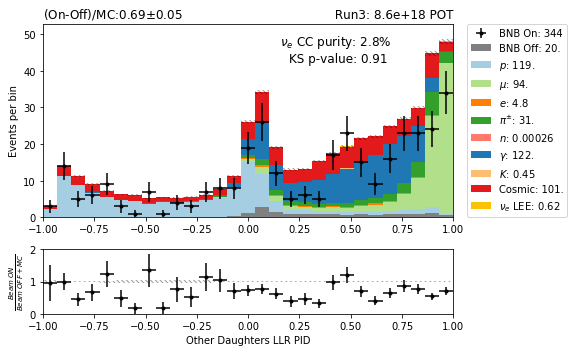

<IPython.core.display.Javascript object>

In [39]:
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(5 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "trk_llr_pid_score_v",
    "Other Daughters LLR PID",
    N_bins=29,
    x_min=-1,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.7,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_pid.pdf", bbox_inches="tight")

MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086
MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086


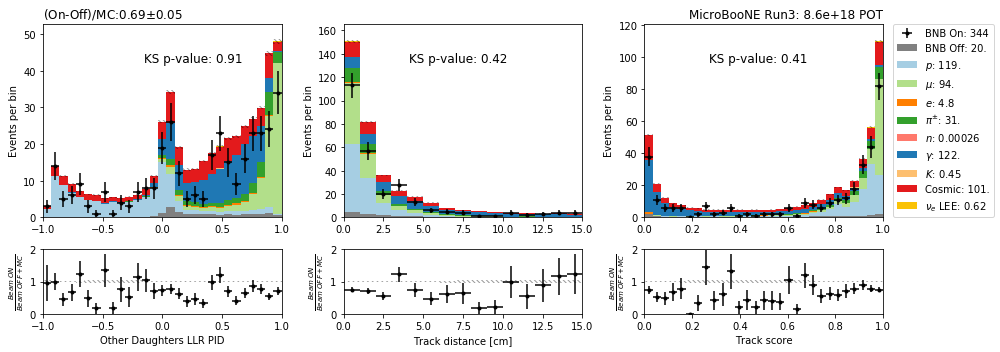

<IPython.core.display.Javascript object>

In [40]:
fig, ax = plt.subplots(
    ncols=3, nrows=2, figsize=(14, 5), gridspec_kw={"height_ratios": [3, 1]}
)
ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Other Daughters LLR PID",
    N_bins=29,
    x_min=-1,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str="",
    kind="pdg",
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.7,
    ax[0][0].get_ylim()[1] * 0.8,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "trk_distance_v",
    "Track distance [cm]",
    N_bins=15,
    x_min=0,
    x_max=15,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str="",
    kind="pdg",
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.7,
    ax[0][1].get_ylim()[1] * 0.8,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][1].set_title("", loc="left")

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[2],
    "trk_score_v",
    "Track score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str,
    kind="pdg",
)
ax[0][2].text(
    ax[0][2].get_xlim()[1] * 0.7,
    ax[0][2].get_ylim()[1] * 0.8,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][2].set_title("", loc="left")


fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_1.pdf", bbox_inches="tight")

MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086
MC category: $p$: 119. 	#entries 57198
MC category: $\mu$: 94. 	#entries 14207
MC category: $e$: 4.8 	#entries 25849
MC category: $\pi^{\pm}$: 31. 	#entries 15946
MC category: $n$: 0.00026 	#entries 2
MC category: $\gamma$: 122. 	#entries 31421
MC category: $K$: 0.45 	#entries 185
MC category: Cosmic: 101. 	#entries 38086


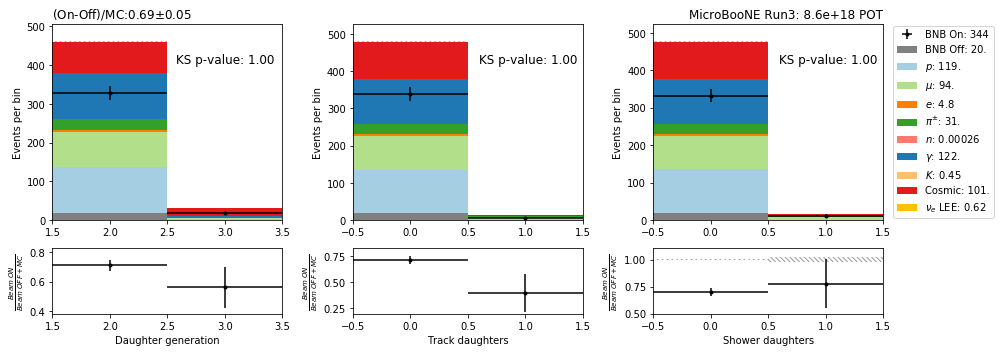

<IPython.core.display.Javascript object>

In [41]:
fig, ax = plt.subplots(
    ncols=3, nrows=2, figsize=(14, 5), gridspec_kw={"height_ratios": [3, 1]}
)
ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "pfp_generation_v",
    "Daughter generation",
    N_bins=2,
    x_min=1.5,
    x_max=3.5,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str="",
    kind="pdg",
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.99,
    ax[0][0].get_ylim()[1] * 0.8,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "pfp_trk_daughters_v",
    "Track daughters",
    N_bins=2,
    x_min=-0.5,
    x_max=1.5,
    query="~e_candidate>0 & preselect",
    legend=False,
    title_str="",
    kind="pdg",
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.99,
    ax[0][1].get_ylim()[1] * 0.8,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][1].set_title("", loc="left")

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[2],
    "pfp_shr_daughters_v",
    "Shower daughters",
    N_bins=2,
    x_min=-0.5,
    x_max=1.5,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str,
    kind="pdg",
)
ax[0][2].text(
    ax[0][2].get_xlim()[1] * 0.99,
    ax[0][2].get_ylim()[1] * 0.8,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][2].set_title("", loc="left")


fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_2.pdf", bbox_inches="tight")

## Combined BDT
1. feature score (0.679704)
2. feature score_other_min (0.157629)
3. feature contained_fraction (0.040859)
4. feature n_showers (0.035973)
5. feature hits_ratio (0.033746)
6. feature score_other_mean (0.032446)
7. feature n_pfp_farvtx (0.019643)

MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 2.1 	#entries 17670
MC category: $\nu_e$ CC 0$\pi$0p: 0.62 	#entries 4233
MC category: $\nu_e$ CC 0$\pi$Np: 2.9 	#entries 20652
MC category: $\nu_{\mu}$ CC other: 23. 	#entries 3388
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 66. 	#entries 10183
MC category: $\nu$ NC: 4.6 	#entries 714
MC category: $\nu$ NC $\pi^{0}$: 34. 	#entries 5283
MC category: Cosmic: 11. 	#entries 2534
MC category: Out of FV: 7.1 	#entries 1497
MC category: Out of Cryo: 1.3 	#entries 42


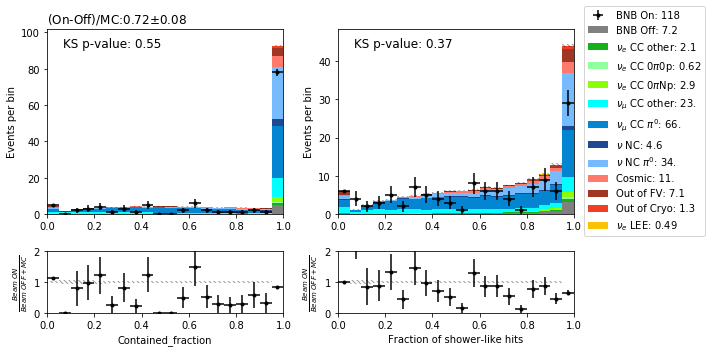

<IPython.core.display.Javascript object>

In [42]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(10, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "contained_fraction",
    r"Contained_fraction",
    N_bins=20,
    x_min=0,
    x_max=1,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="cat",
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.5,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)


ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "hits_ratio",
    r"Fraction of shower-like hits",
    N_bins=20,
    x_min=0,
    x_max=1,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str="",
    kind="cat",
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.5,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][1].set_title("", loc="left")

fig.tight_layout()
fig.savefig(output_dir + "data_mc/bdt_1.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:561: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:562: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 0.44 	#entries 3732
MC category: $\nu_e$ CC 0$\pi$0p: 0.33 	#entries 2220
MC category: $\nu_e$ CC 0$\pi$Np: 1.8 	#entries 12568
MC category: $\nu_{\mu}$ CC other: 0.65 	#entries 81
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.30 	#entries 47
MC category: $\nu$ NC: 0.25 	#entries 38
MC category: $\nu$ NC $\pi^{0}$: 0.87 	#entries 135
MC category: Cosmic: 0.15 	#entries 60
MC category: Out of FV: 0.40 	#entries 138
MC category: Out of Cryo: 0.10 	#entries 3


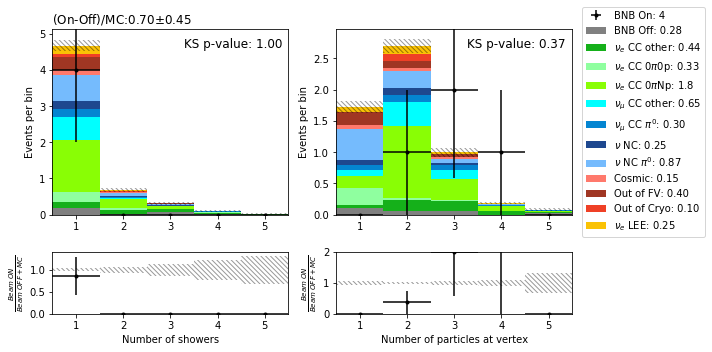

<IPython.core.display.Javascript object>

In [43]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(10, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "n_showers",
    r"Number of showers",
    N_bins=5,
    x_min=0.5,
    x_max=5.5,
    legend=False,
    query="e_candidate>0 & select",
    title_str="",
    kind="cat",
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.99,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)


ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "n_pfpvtx",
    r"Number of particles at vertex",
    N_bins=5,
    x_min=0.5,
    x_max=5.5,
    legend=True,
    query="e_candidate>0 & select",
    title_str="",
    kind="cat",
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.99,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)
ax[0][1].set_title("", loc="left")

fig.tight_layout()
fig.savefig(output_dir + "data_mc/post_npfp.pdf", bbox_inches="tight")